<a href="https://colab.research.google.com/github/swarnava-96/Clustering/blob/main/Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Kmeans Clustering on Customers Dataset**

In [1]:
cd "/content/drive/MyDrive/Datasets"

/content/drive/MyDrive/Datasets


### Importing the necessary libraries and loading the dataset

In [2]:
# Importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Loading the dataset

df = pd.read_csv('Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Taking the necessary features we require for clustering 

In [4]:
# Array

X = df.iloc[:,[3,4]].values

### Lets use the Elbow method to determine the number of clusters 

In [5]:
from sklearn.cluster import KMeans

In [6]:
# Using a for loop for selecting the best value of k 

wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = "k-means++", random_state = 0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

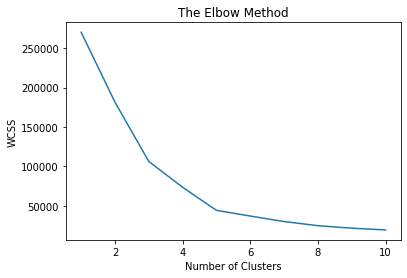

In [7]:
# Plotting the Elbow

plt.plot(range(1, 11), wcss)
plt.title("The Elbow Method")
plt.ylabel("WCSS")
plt.xlabel("Number of Clusters")
plt.show();

### Fitting Kmeans 

In [8]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(X)

### Visualizing the clusters

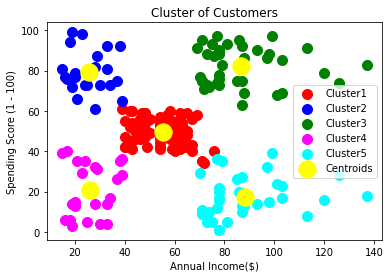

In [9]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'magenta', label = 'Cluster4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'cyan', label = 'Cluster5')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c = 'yellow', label = 'Centroids')

plt.title("Cluster of Customers")
plt.xlabel("Annual Income($)")
plt.ylabel("Spending Score (1 - 100)")
plt.legend()
plt.show();